### check the selected tokens

/tmp/ipykernel_2547155/4223499638.py:37: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  losses_cur_train = torch.load(f"results/loss/token_losses_{dataset_name_tag}_{cur_trai

#### all token counting: 908001

model pair: (Llama-3.2-3B, Llama-3.1-8B-Instruct) -- dataset: alpaca_52k-active-split_0
the token proportion with positive token loss: 59.42%


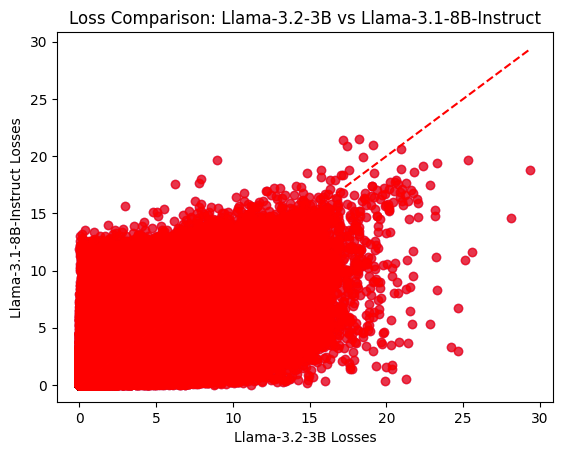

In [17]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os

def get_global_top_k_indices(data, k):

    flattened = [(value, idx) for idx, value in enumerate(data)]
    
    top_k = sorted(flattened, key=lambda x: x[0], reverse=True)[:k] ##loss
    
    top_k_indices = [item[1] for item in top_k]  #item[2]+1 fix the first label biased to match the position
    return top_k_indices




ref_model_name_or_path = "meta-llama/Llama-3.1-8B-Instruct"
base_model_name_or_path = "meta-llama/Llama-3.2-3B"
subset_size = 1
data_prop=1

ref_model_name = os.path.basename(ref_model_name_or_path)


for idx in range(subset_size):
    
    ###train data
    dataset_name_tag = f"alpaca_52k-active-split_{idx}"

    if idx == 0:
        cur_train_model_name = os.path.basename(base_model_name_or_path)
    else:
        cur_train_model_name = f"lora_merged_alpaca_52k-active-split-5k_{idx-1}"
    

    losses_cur_train = torch.load(f"results/loss/token_losses_{dataset_name_tag}_{cur_train_model_name}.pt")
    losses_ref = torch.load(f"results/loss/token_losses_{dataset_name_tag}_{ref_model_name}.pt")

    input_cur_train = [value for sublist in losses_cur_train for value in sublist]
    input_ref = [value for sublist in losses_ref for value in sublist]

    ##the calculation different loss of two models
    losses_diff = [loss1 - loss2 for loss1, loss2 in zip(input_cur_train, input_ref)]


    all_token_count = sum(len(losses) for losses in losses_ref)
    print(f"#### all token counting: {all_token_count}\n")

    print(f"model pair: ({cur_train_model_name}, {ref_model_name}) -- dataset: {dataset_name_tag}")
    print(f"Token proportion with positive token loss: {round(sum(1 for loss in losses_diff if loss > 0) / len(losses_diff) * 100, 2)}%")
    select_global_tokens_indices = get_global_top_k_indices(losses_diff, int(all_token_count * data_prop))


    plt.scatter(input_ref, input_cur_train, c='blue', alpha=0.3)

    selected_train = [input_cur_train[i] for i in select_global_tokens_indices]
    selected_ref = [input_ref[i] for i in select_global_tokens_indices]
    plt.scatter(selected_ref, selected_train, c='red', label="Top Selected Tokens", alpha=0.7)


    # 添加标题和标签
    plt.title(f"Loss Comparison: {cur_train_model_name} vs {ref_model_name}")
    plt.xlabel(f"{cur_train_model_name} Losses")
    plt.ylabel(f"{ref_model_name} Losses")
    
    min_val = min(min(input_cur_train), min(input_ref))
    max_val = max(max(input_cur_train), max(input_ref))
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x')

    # 显示图形
    plt.show()
    
    # print(f"Similarity ratio: {similarity_ratio:.2%}")
    # print(f"Union ratio: {union_ratio:.2%}")

In [8]:
losses_diff[select_global_tokens_indices[-1]]

-0.0006215974572114646

## Plot the loss figure

/tmp/ipykernel_3373775/3948118875.py:61: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  losses_cur_train = torch.load(f"results/loss/token_losses_{dataset_name_tag}_{cur_trai

#### all token counting: 5265359

Dataset: filtered-cured-50k-active-split-global-curve-positive_0 -- Token proportion with positive loss diff : 63.61%
Dataset: filtered-cured-50k-active-split-global-curve-positive_0 -- selected Token proportion with positive loss diff: 31.8%
#### all token counting: 5184741

Dataset: filtered-cured-50k-active-split-global-curve-positive_1 -- Token proportion with positive loss diff : 62.42%
Dataset: filtered-cured-50k-active-split-global-curve-positive_1 -- selected Token proportion with positive loss diff: 31.21%
#### all token counting: 5082345

Dataset: filtered-cured-50k-active-split-global-curve-positive_2 -- Token proportion with positive loss diff : 65.16%
Dataset: filtered-cured-50k-active-split-global-curve-positive_2 -- selected Token proportion with positive loss diff: 32.58%
#### all token counting: 4810634

Dataset: filtered-cured-50k-active-split-global-curve-positive_3 -- Token proportion with positive loss diff : 62.09%
Dataset: filter

/tmp/ipykernel_3373775/3948118875.py:108: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/jinlong/LLM_token_selection/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


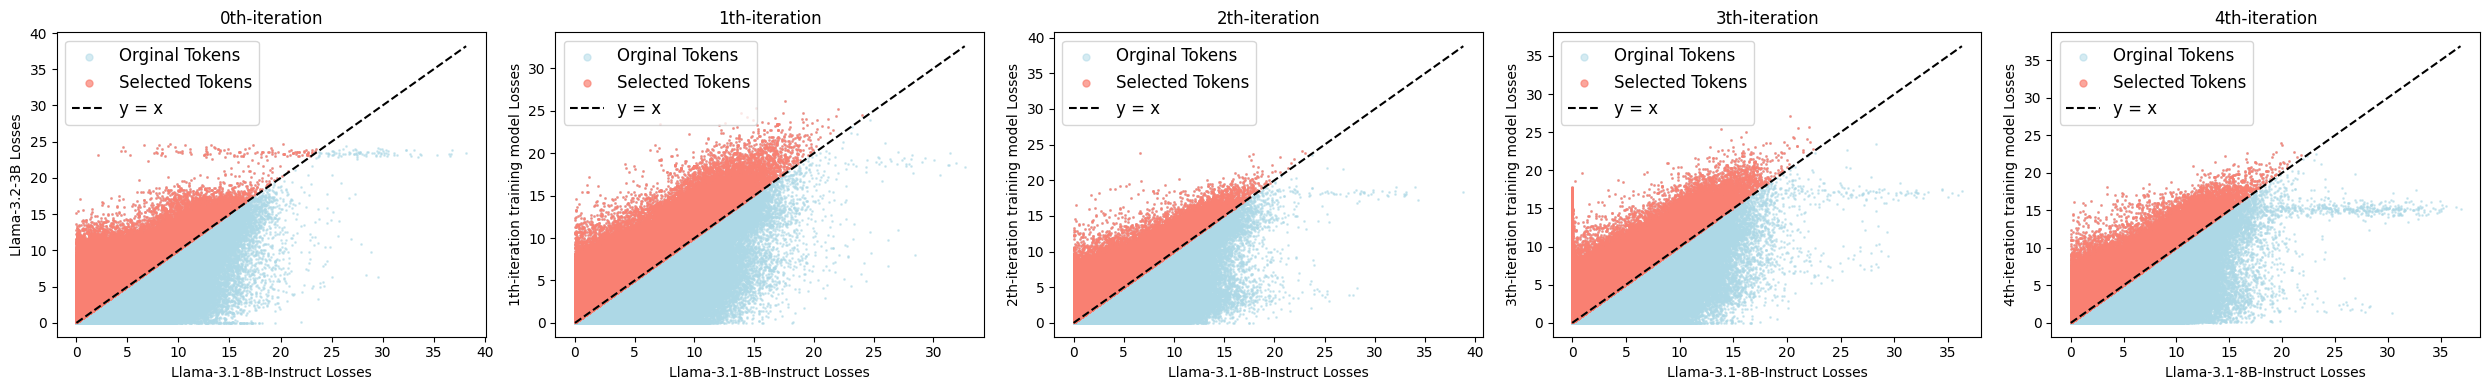

In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os

def get_global_top_k_indices(data, k):
    flattened = [(value, idx) for idx, value in enumerate(data)]
    top_k = sorted(flattened, key=lambda x: x[0], reverse=True)[:k]  ##loss
    top_k_indices = [item[1] for item in top_k]
    return top_k_indices


def get_half_positive_indices(data):
    selected_flattened = [(value, idx) for idx, value in enumerate(data) if value > 0]
    top_half_positive = sorted(selected_flattened, key=lambda x: x[0], reverse=True)[:int(len(selected_flattened)/2)] ##loss

    top_half_positive_indices = [item[1] for item in top_half_positive]
    return top_half_positive_indices

def get_curve_positive_indices(losses_pre, losses_cur):
    
    alpha = 1.2
    beta = 0.1
    curve_positive_indices=[]
    
    for idx, (sample_losses_pre, sample_losses_cur) in enumerate(zip(losses_pre, losses_cur)):
            if sample_losses_pre > alpha * sample_losses_cur + beta and sample_losses_cur <5: #linear split
                curve_positive_indices.append(idx)

    return curve_positive_indices

# Data and training parameters
###################################################

ref_model_name_or_path = "meta-llama/Llama-3.1-8B-Instruct"
base_model_name_or_path = "meta-llama/Llama-3.2-3B"

# dataset_name = "alpaca_52k-active-split"
dataset_name="filtered-cured-50k-active-split-global-curve-positive"
subset_size = 5 # 增加子集数量以绘制多个子图
data_prop = 0.6

ref_model_name = os.path.basename(ref_model_name_or_path)

# 创建一个大的图形框架
fig, axes = plt.subplots(1, subset_size, figsize=(5 * subset_size, 4))

# fig, axes = plt.subplots(subset_size, 1, figsize=( 5, 4 * subset_size))


for idx in range(subset_size):
    dataset_name_tag = f"{dataset_name}_{idx}"

    if idx == 0:
        cur_train_model_name = os.path.basename(base_model_name_or_path)
        cur_train_model_tag = os.path.basename(base_model_name_or_path)
    else:
        cur_train_model_name = f"lora_merged_{dataset_name}_{idx-1}"
        cur_train_model_tag = f"{idx}th-iteration training model"

    losses_cur_train = torch.load(f"results/loss/token_losses_{dataset_name_tag}_{cur_train_model_name}.pt")
    losses_ref = torch.load(f"results/loss/token_losses_{dataset_name_tag}_{ref_model_name}.pt")

    input_cur_train = [value for sublist in losses_cur_train for value in sublist]
    input_ref = [value for sublist in losses_ref for value in sublist]

    # 计算两个模型的损失差异
    losses_diff = [loss1 - loss2 for loss1, loss2 in zip(input_cur_train, input_ref)]

    all_token_count = sum(len(losses) for losses in losses_ref)
    print(f"#### all token counting: {all_token_count}\n")

    print(f"Dataset: {dataset_name_tag} -- Token proportion with positive loss diff : {round(sum(1 for loss in losses_diff if loss > 0) / len(losses_diff) * 100, 2)}%")

    # select_global_tokens_indices = get_global_top_k_indices(losses_diff, int(all_token_count * data_prop))
    select_global_tokens_indices = get_half_positive_indices(losses_diff)
    # select_global_tokens_indices = get_curve_positive_indices(input_cur_train, input_ref)
    print(f"Dataset: {dataset_name_tag} -- selected Token proportion with positive loss diff: {round(len(select_global_tokens_indices) / len(losses_diff) * 100, 2)}%")

    # 选择合适的子图
    ax = axes[idx]  # 选择对应的子图轴

    # 绘制散点图
    ax.scatter(input_ref, input_cur_train, c='lightblue', s=1, alpha=0.5, label='Orginal Tokens')

    selected_train = [input_cur_train[i] for i in select_global_tokens_indices]
    selected_ref = [input_ref[i] for i in select_global_tokens_indices]
    ax.scatter(selected_ref, selected_train, c='salmon', s=1, label="Selected Tokens", alpha=0.7)

    # 添加标题和标签
    ax.set_title(f"{idx}th-iteration")
    ax.set_xlabel(f"{ref_model_name} Losses")
    ax.set_ylabel(f"{cur_train_model_tag} Losses")

    # 绘制对角线 y = x
    min_val = min(min(input_cur_train), min(input_ref))
    max_val = max(max(input_cur_train), max(input_ref))
    ax.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', label='y = x')

    # x_vals = np.linspace(min_val, max_val, 500)
    # y_vals = 1.2 * x_vals + 3
    # ax.plot(x_vals, y_vals, color='black', linestyle='-', label='y = 1.2x +3')

    # 显示图例
    ax.legend(fontsize=12, markerscale=5)

# 调整图形布局
plt.tight_layout()

# 显示所有子图
plt.show()


In [26]:
def get_curve_positive_indices(losses_pre, losses_cur):
    
    alpha = 1.2
    beta = 0.2
    curve_positive_indices=[]
    
    for idx, (sample_losses_pre, sample_losses_cur) in enumerate(zip(losses_pre, losses_cur)):
            if sample_losses_pre > alpha * sample_losses_cur + beta and sample_losses_cur < 5: #linear split
                curve_positive_indices.append(idx)

    return curve_positive_indices

select_global_tokens_indices = get_curve_positive_indices(input_cur_train, input_ref)



In [27]:
len(select_global_tokens_indices) /len(losses_diff)

0.16084049797255343

In [23]:
half_indices = get_half_positive_indices(losses_diff)

In [25]:
losses_diff[half_indices[-1]]

0.0712142139673233